# Physics-based battery modelling with PyBaMM

Python Battery Mathematical Modelling (PyBaMM) is an open-source software package for physics-based modelling of Li-ion batteries. This notebook will help to demonstrate some of the physical processes happening inside a cell. We will subject a virtual battery to conditions similar to the parameterisation data and drive cycle supplied in this project.

First, install and import PyBaMM and other Python libraries we may need.

In [1]:
%pip install pybamm -q    # install PyBaMM if it is not installed
import pybamm
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


PyBaMM can run a range of physics-based models. The pseudo-2D model, also known as the Doyle-Fuller-Newman model after its inventors, was published in 1993 and has been widely used ever since.

In [2]:
model = pybamm.lithium_ion.DFN()

The DFN model requires many input parameters. We are going to use the parameters from O'Kane et al. (2022), which were also for a cylindrical cell. Load these parameters but allow the temperature to be varied by the user.

In [3]:
param = pybamm.ParameterValues("OKane2022")
param["Ambient temperature [K]"] = pybamm.InputParameter("T")
param

{'Ambient temperature [K]': InputParameter(-0x1e86c5900d780302, T, children=[], domains={}),
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell thermal expansion coefficient [m.K-1]': 1.1e-06,
 'Cell volume [m3]': 2.42e-05,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 5.0,
 'Dead lithium decay constant [s-1]': 1e-06,
 'Dead lithium decay rate [s-1]': <function SEI_limited_dead_lithium_OKane2022 at 0x2834767a0>,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008_arrhenius at 0x283475f80>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008_arrhenius at 0x283476020>,
 'Electron charge [C]': 1.602176634e-19,
 'Exchange-current dens

We will use the Experiment class to define the simulation conditions.

In [4]:
exp = pybamm.Experiment([
    "Rest for 10 seconds (0.1s period)",
    "Discharge at 2C for 1 minutes (0.1s period)",
    "Rest for 2 minutes (0.1s period)",
])

Specify the mesh. Many problems in PyBaMM can be solved by increasing r_n or r_p.

In [5]:
var_pts = {
    "x_n": 40, # electrode cells
    "x_s": 40, # electrolyte
    "x_p": 40, # electrode
    "r_n": 40, # cells inside sphere
    "r_p": 40, # cells inside sphere
}

Create a Simulation class using the model, parameter values, Experiment and mesh defined earlier, then solve it! Because temperature was set to be an input parameter, it must be fed into the solve() command every time.

In [6]:
sim = pybamm.Simulation(model=model, parameter_values=param, experiment=exp, var_pts=var_pts)
sol = sim.solve(inputs={"T": 298.15})  #25 Celsius

Figure 1: Plot the components that make up the voltage drop during the pulse.

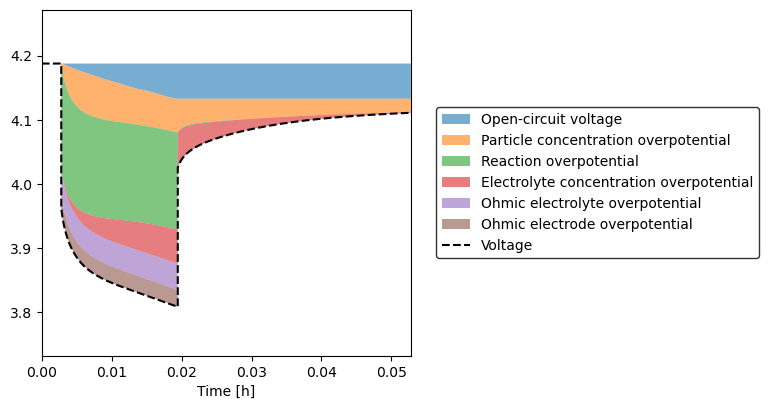

In [7]:
pl = pybamm.plot_voltage_components(sol)

Figure 2: plot the concentrations of lithium inside the cell. $x$ is the axis between the negative and positive current collectors. $r$ is the radial position in the electrode particles. Drag the slider to see the distribution of lithium at different times during the pulse.

In [1]:
output_variables = [
        "Negative particle concentration [mol.m-3]",
        "Electrolyte concentration [mol.m-3]",
        "Positive particle concentration [mol.m-3]",
        "Current [A]",
        "Voltage [V]",
    ]
quick_plot = pybamm.QuickPlot(
    sol,output_variables,variable_limits='fixed',   # variable_limits='tight',
    time_unit='hours',n_rows=2) #figsize = (18,12),

fig = quick_plot.dynamic_plot()

NameError: name 'pybamm' is not defined